In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
import numpy as np

In [2]:
dataset = '/content/drive/MyDrive/Project II (Sem VII)/Liver Patient Dataset (LPD)_train.csv'

In [3]:
df = pd.read_csv(dataset, encoding='ISO-8859-1')

In [4]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [6]:
df = df.drop('Gender of the patient', axis=1)

In [7]:
df = df.dropna(subset=['Age of the patient'])

In [8]:
df.rename(columns={
    'Age of the patient': 'Age',
    'Total Bilirubin': 'Bilirubin_Total',
    'Direct Bilirubin': 'Bilirubin_Direct',
    ' Alkphos Alkaline Phosphotase': 'Alkaline_Phosphatase',
    ' Sgpt Alamine Aminotransferase': 'SGPT',
    'Sgot Aspartate Aminotransferase': 'SGOT',
    'Total Protiens': 'Proteins_Total',
    ' ALB Albumin': 'Albumin',
    'A/G Ratio Albumin and Globulin Ratio': 'Albumin_Globulin_Ratio'
}, inplace=True)

In [9]:
df

,Age,Bilirubin_Total,Bilirubin_Direct,Alkaline_Phosphatase,SGPT,SGOT,Proteins_Total,Albumin,Albumin_Globulin_Ratio,Result
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
30686,50.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [10]:
# Fill missing values using the median for the renamed columns
df['Bilirubin_Total'].fillna(df['Bilirubin_Total'].median(), inplace=True)
df['Bilirubin_Direct'].fillna(df['Bilirubin_Direct'].median(), inplace=True)
df['Alkaline_Phosphatase'].fillna(df['Alkaline_Phosphatase'].median(), inplace=True)
df['SGPT'].fillna(df['SGPT'].median(), inplace=True)
df['SGOT'].fillna(df['SGOT'].median(), inplace=True)
df['Proteins_Total'].fillna(df['Proteins_Total'].median(), inplace=True)
df['Albumin'].fillna(df['Albumin'].median(), inplace=True)
df['Albumin_Globulin_Ratio'].fillna(df['Albumin_Globulin_Ratio'].median(), inplace=True)

# Check if there are any remaining missing values
print(df.isnull().sum())


Age                       0
Bilirubin_Total           0
Bilirubin_Direct          0
Alkaline_Phosphatase      0
SGPT                      0
SGOT                      0
Proteins_Total            0
Albumin                   0
Albumin_Globulin_Ratio    0
Result                    0
dtype: int64


In [12]:
result_mapping = { 1 : 0, 2:1}

In [13]:
df['Result'] = df['Result'].map(result_mapping)

In [14]:
X = df.drop('Result', axis=1)  # All columns except the target
y = df['Result']  # Target column

In [15]:
y.isna().sum()

0

In [16]:
X.isna().sum()

,0
Age,0
Bilirubin_Total,0
Bilirubin_Direct,0
Alkaline_Phosphatase,0
SGPT,0
SGOT,0
Proteins_Total,0
Albumin,0
Albumin_Globulin_Ratio,0


In [17]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [23]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [24]:
params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',        # evaluation metric
    'max_depth': 6,                  # maximum depth of a tree
    'eta': 0.3,                      # learning rate (step size shrinkage)
    'scale_pos_weight': len(y_train) / sum(y_train),  # to handle imbalanced data
    'random_state': 42
}

In [25]:
bst = xgb.train(params, dtrain, num_boost_round=100)

In [26]:
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.69%


In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4377   18]
 [   9 4362]]


In [29]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4395
           1       1.00      1.00      1.00      4371

    accuracy                           1.00      8766
   macro avg       1.00      1.00      1.00      8766
weighted avg       1.00      1.00      1.00      8766



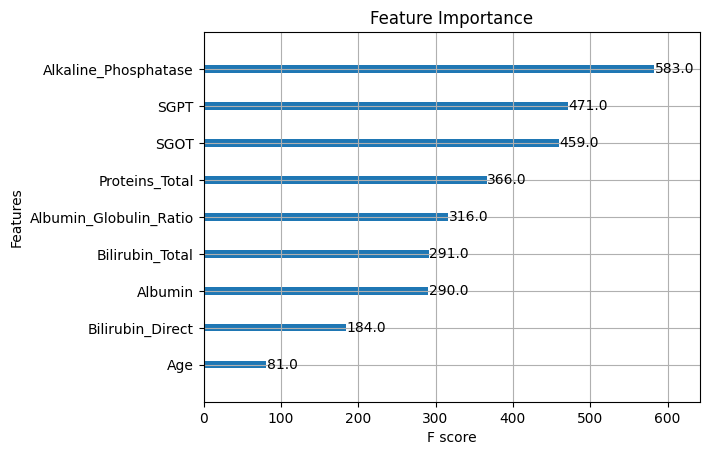

In [30]:
xgb.plot_importance(bst)
plt.title('Feature Importance')
plt.show()

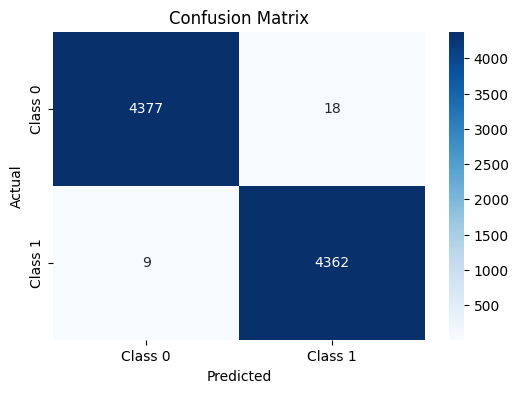

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

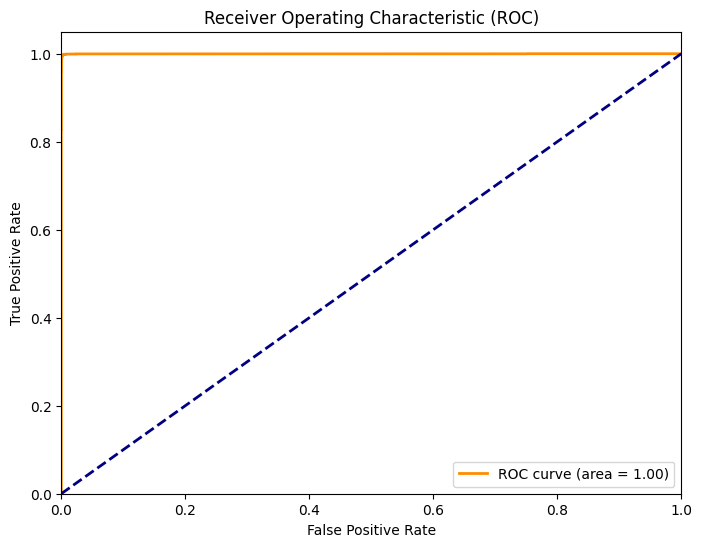

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [35]:
X_train.sort_index()

,Age,Bilirubin_Total,Bilirubin_Direct,Alkaline_Phosphatase,SGPT,SGOT,Proteins_Total,Albumin,Albumin_Globulin_Ratio
2,62.000000,7.300000,4.1,490.0,60.000000,68.000000,7.000000,3.300000,0.890000
3,58.000000,1.000000,0.4,182.0,14.000000,20.000000,6.800000,3.400000,1.000000
5,46.000000,1.800000,0.7,208.0,19.000000,14.000000,7.600000,4.400000,1.300000
6,26.000000,0.900000,0.2,154.0,35.000000,12.000000,7.000000,3.500000,1.000000
8,17.000000,0.900000,0.3,202.0,22.000000,19.000000,7.400000,4.100000,1.200000
...,...,...,...,...,...,...,...,...,...
43825,42.000000,0.900000,0.2,175.0,24.000000,54.000000,5.500000,2.700000,0.900000
43826,38.000000,0.600000,0.1,270.0,23.000000,42.000000,5.100000,2.000000,0.500000
43827,67.353678,0.745123,0.2,209.0,18.451226,25.743869,5.935368,2.770736,0.876343
43828,44.136940,1.000000,0.3,216.0,21.000000,24.000000,7.300000,3.705494,1.500000


In [37]:
y_train.sort_index()

,Result
2,0
3,0
5,0
6,0
8,1
...,...
43825,1
43826,1
43827,1
43828,1
